# Regressão logística para prever o tipo de exercício.
Variável dependente é "label". Transformar em classes de 0 a 4.

Calcular matriz de confusão e classification_report. Explicar dados do classification_report.

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from sklearn import metrics

df = pd.read_csv('/home/exercise_angles.csv')
df.head(2)

,Side,Shoulder_Angle,Elbow_Angle,Hip_Angle,Knee_Angle,Ankle_Angle,Shoulder_Ground_Angle,Elbow_Ground_Angle,Hip_Ground_Angle,Knee_Ground_Angle,Ankle_Ground_Angle,Label
0,left,10.639208,174.466813,174.785143,179.848140,179.419276,90.0,90.0,90.0,90.0,90.0,Jumping Jacks
1,left,10.590342,174.428706,174.765042,179.775215,179.386147,90.0,90.0,90.0,90.0,90.0,Jumping Jacks


In [4]:
# Transformar a variável 'Label' em classes de 0 a 4 usando LabelEncoder
label_encoder = LabelEncoder()
df['Label'] = label_encoder.fit_transform(df['Label'])

# Separar variáveis independentes (X) e variável dependente (y)
X = df.drop(columns=['Label'])  # Supondo que 'Label' é a variável alvo
y = df['Label']


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [6]:
# Verificar os tipos de dados para identificar colunas categóricas
print(df.dtypes)


Side                      object
Shoulder_Angle           float64
Elbow_Angle              float64
Hip_Angle                float64
Knee_Angle               float64
Ankle_Angle              float64
Shoulder_Ground_Angle    float64
Elbow_Ground_Angle       float64
Hip_Ground_Angle         float64
Knee_Ground_Angle        float64
Ankle_Ground_Angle       float64
Label                      int64
dtype: object


In [7]:
# Aplicar One-Hot Encoding à coluna 'Side'
df_encoded = pd.get_dummies(df, columns=['Side'], drop_first=True)


In [8]:
# Separar as variáveis independentes (X) e a dependente (y)
X = df_encoded.drop(columns=['Label'])
y = df_encoded['Label']


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [10]:
# Instanciar e treinar o modelo de regressão logística
log_reg = LogisticRegression(max_iter=1000) # Definir um número maior de iterações para garantir a convergência
log_reg.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

<Axes: >

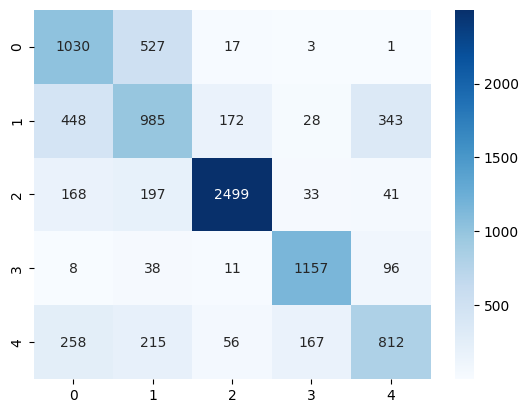

In [19]:
y_pred = log_reg.predict(X_test)

# Calcular matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues")

In [20]:
# Fazer previsões
y_pred = log_reg.predict(X_test)
# Gerar classification_report
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)


Classification Report:
               precision    recall  f1-score   support

           0       0.54      0.65      0.59      1578
           1       0.50      0.50      0.50      1976
           2       0.91      0.85      0.88      2938
           3       0.83      0.88      0.86      1310
           4       0.63      0.54      0.58      1508

    accuracy                           0.70      9310
   macro avg       0.68      0.68      0.68      9310
weighted avg       0.70      0.70      0.70      9310

